In [1]:
import sys
import os
import numpy as np
import pandas as pd

import h5py

import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

from vis_helpers import *


In [2]:
#Load scores

score_file = h5py.File('../../../examples/saved_models/gtex_CD99/scores_f3c0.h5', 'r')

scores = score_file['grads'][()][:, :, :, 0]
seqs = score_file['seqs'][()][:]
genes = score_file['gene'][()][:]
genes = np.array([genes[j].decode() for j in range(genes.shape[0])])
strands = score_file['strand'][()][:]
strands = np.array([strands[j].decode() for j in range(strands.shape[0])])

#Input-gate the scores
scores = scores * seqs

print("scores.shape = " + str(scores.shape))


scores.shape = (1, 524288, 4)


-- 0 (+) --
 - gene_id = 'ENSG00000002586.20


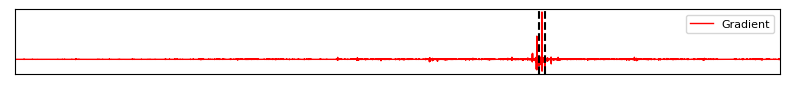

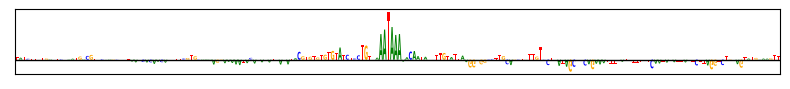

In [3]:
#Visualize polya-centric gradient for gene(s)

#Find position of max saliency
max_poses = np.argmax(np.sum(scores, axis=-1), axis=-1)

#Loop over genes
for example_ix in range(scores.shape[0]) :
    
    #Get max pos
    max_pos = max_poses[example_ix]
    
    #Only visualize genes that are not extremely long
    if max_pos >= 150000 and max_pos < seqs.shape[1] - 150000 :
        
        print("-- " + str(example_ix) + " (" + str(strands[example_ix]) + ") --")
        print(" - gene_id = '" + str(genes[example_ix]))

        #Plot scores
        f = plt.figure(figsize=(8, 1))

        #Annotate 4kb window
        plot_start = max_pos - 2000
        plot_end = max_pos + 6 + 2000

        l1 = plt.plot(np.arange(seqs.shape[1]), np.sum(scores[example_ix, ...], axis=-1), linewidth=1, linestyle='-', color='red', label='Gradient')

        plt.axvline(x=plot_start, color='black', linestyle='--')
        plt.axvline(x=plot_end, color='black', linestyle='--')

        plt.xlim(0, seqs.shape[1])
        
        plt.legend(handles=[l1[0]], fontsize=8)
        
        plt.yticks([], [])
        plt.xticks([], [])

        plt.tight_layout()

        plt.show()
        
        #Visualize contribution scores
        plot_start = max_pos - 100
        plot_end = max_pos + 6 + 100
        
        #Rev-comp scores if gene is on minus strand
        if strands[example_ix] == '-' :
            plot_end = seqs.shape[1] - (max_pos - 100)
            plot_start = seqs.shape[1] - (max_pos + 6 + 100)
        
        #Plot sequence logo
        visualize_input_gradient_pair(
            scores[example_ix, :, :] if strands[example_ix] == '+' else scores[example_ix, ::-1, ::-1],
            np.zeros(scores[example_ix, ...].shape),
            plot_start=plot_start,
            plot_end=plot_end,
            save_figs=False,
        )
